# Case Study 2

In [2]:
cd c:\\Users\\91870\\Desktop\\churn_rate

c:\Users\91870\Desktop\churn_rate


### Libraries Needed:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset and Data Cleaning:

In [5]:
dataset = pd.read_csv('churn_data.csv')

In [6]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [7]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [8]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [10]:
dataset.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [11]:
dataset = dataset[pd.notnull(dataset['age'])]

In [12]:
dataset = dataset.drop(columns=['credit_score','rewards_earned'])

In [13]:
dataset.isnull().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

### Data Visualization:

In [14]:
#Histograms

dataset2 = dataset.drop(columns=['user','churn'])

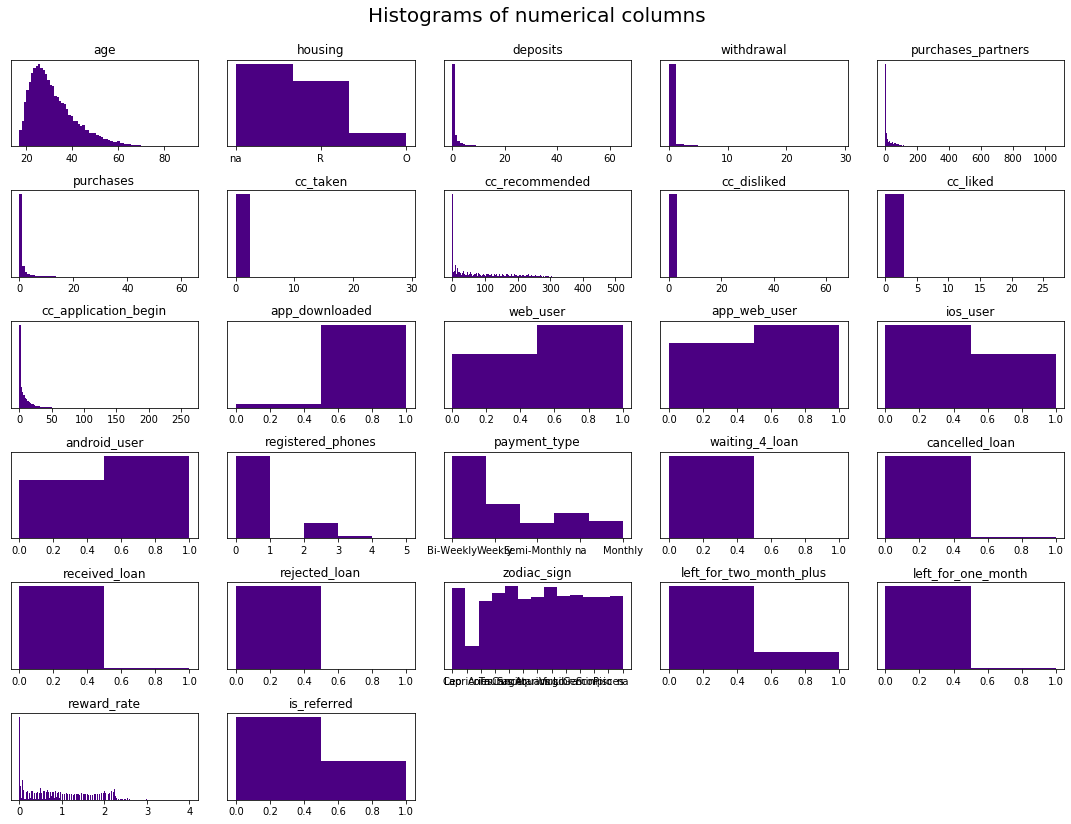

In [26]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of numerical columns',fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(6,5,i)
    f= plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1],bins=vals,color='indigo')
    
plt.tight_layout(rect=[0,0.03,1,0.95])

In [27]:
# PieChart distbutions

dataset2 = dataset[['housing','app_downloaded', 'web_user', 'app_web_user', 'ios_user',
        'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]



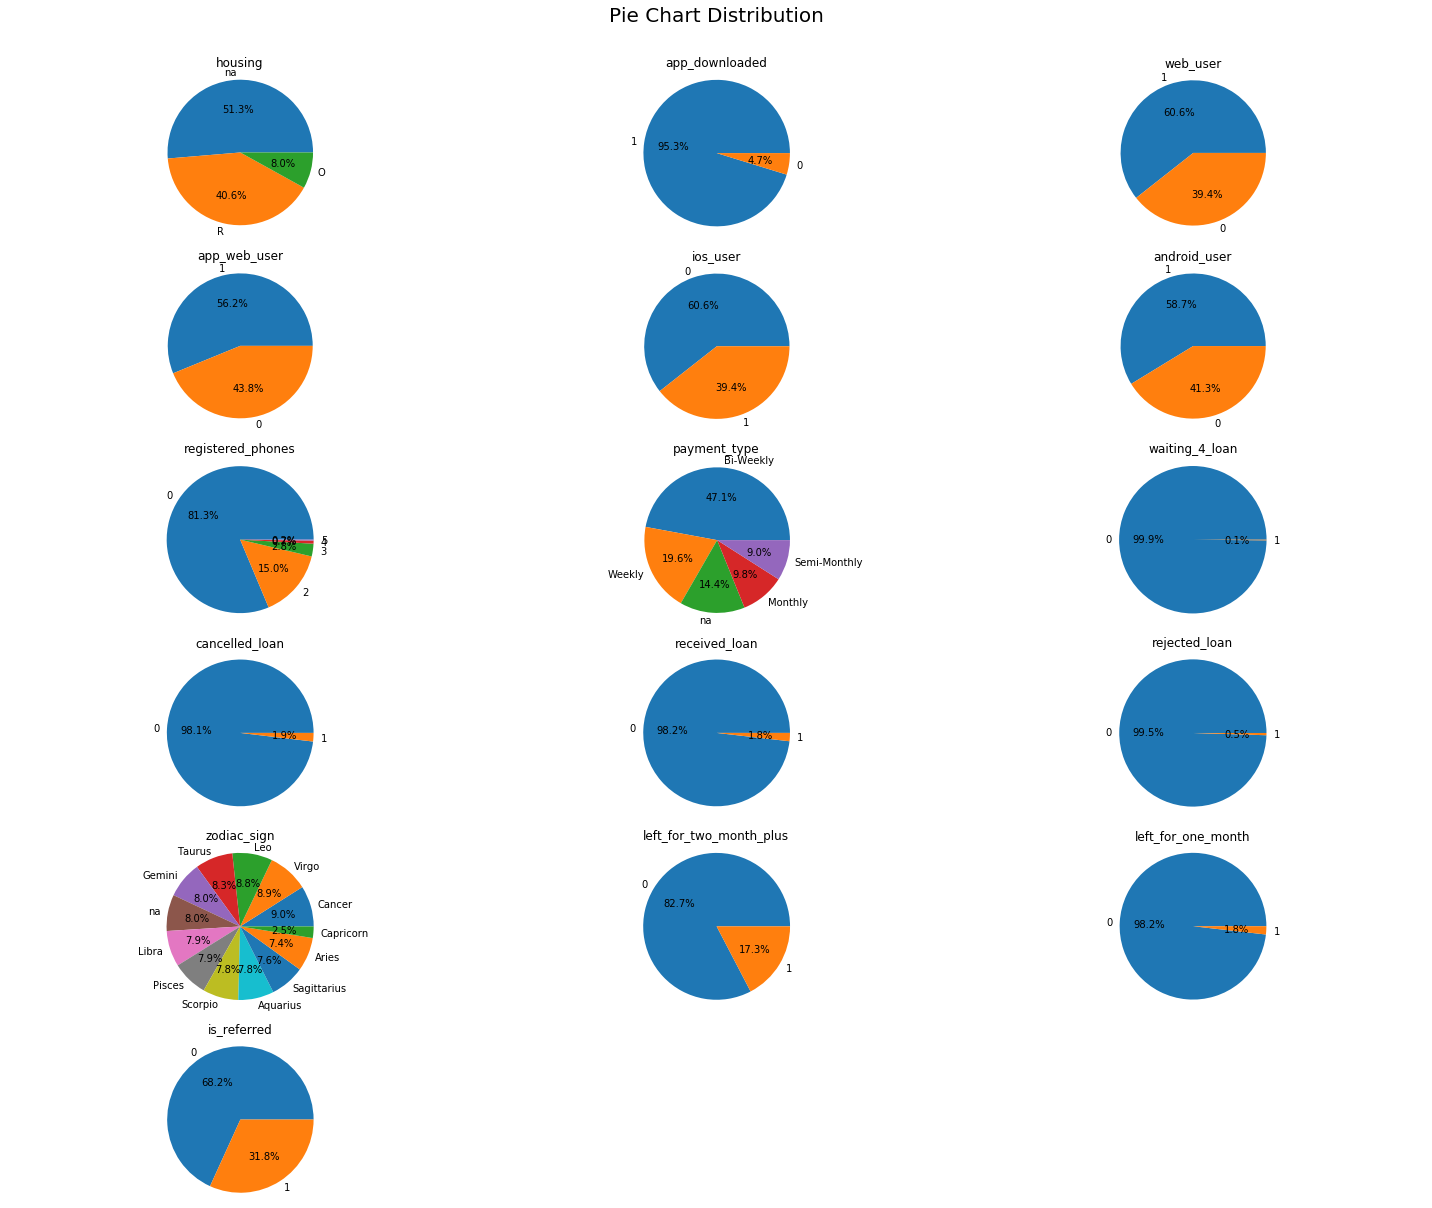

In [33]:
fig = plt.figure(figsize=(20,18))
plt.suptitle('Pie Chart Distribution',fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(6,3,i)
    f= plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    values= dataset2.iloc[:,i-1].value_counts(normalize=True).values
    index = dataset2.iloc[:,i-1].value_counts(normalize=True).index
    
    plt.pie(values,labels=index,autopct='%1.1f%%')
    plt.axis('equal')
    
plt.tight_layout(rect=[0,0.05,1,0.95])

In [34]:
dataset[dataset2.waiting_4_loan==1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [35]:
dataset[dataset2.cancelled_loan==1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [36]:
dataset[dataset2.received_loan==1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [37]:
dataset[dataset2.rejected_loan==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [38]:
 dataset[dataset2.left_for_one_month==1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

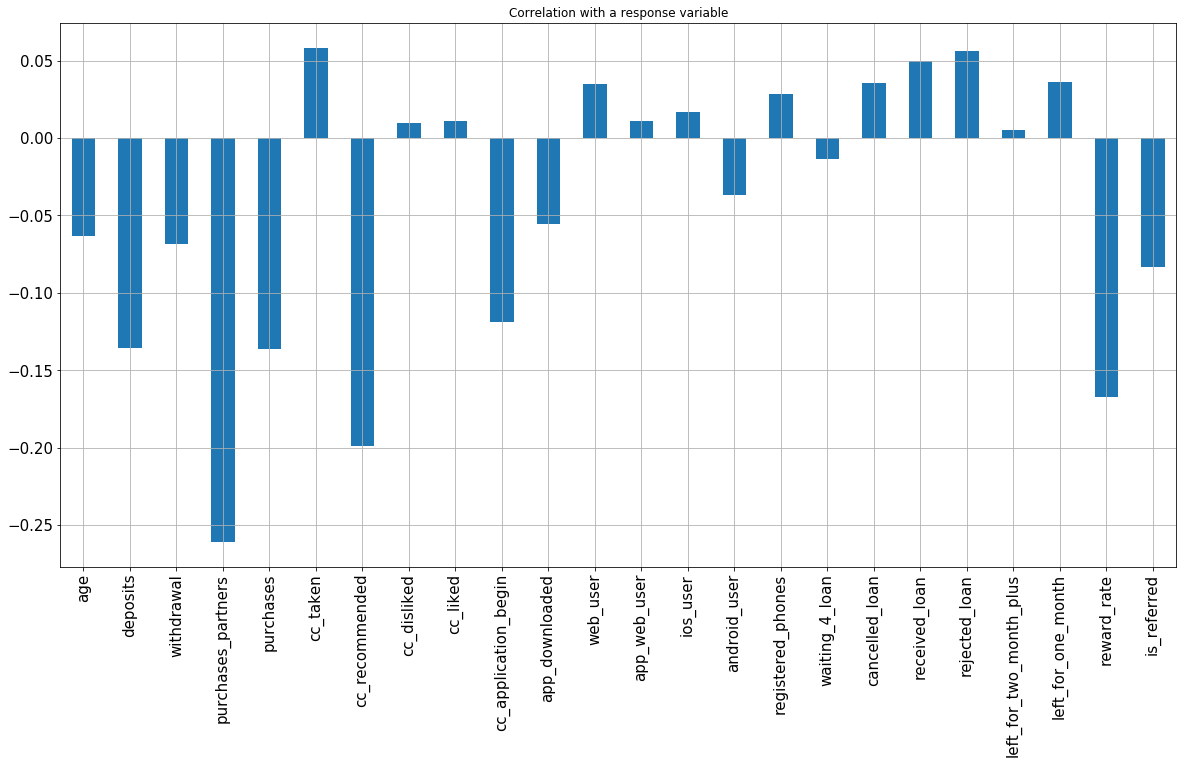

In [40]:
#Correlation plot

dataset.drop(columns=['churn','user','housing','payment_type','zodiac_sign']).corrwith(dataset.churn).plot.bar(figsize=(20,10),title='Correlation with a response variable',fontsize=15,rot=90,grid=True)

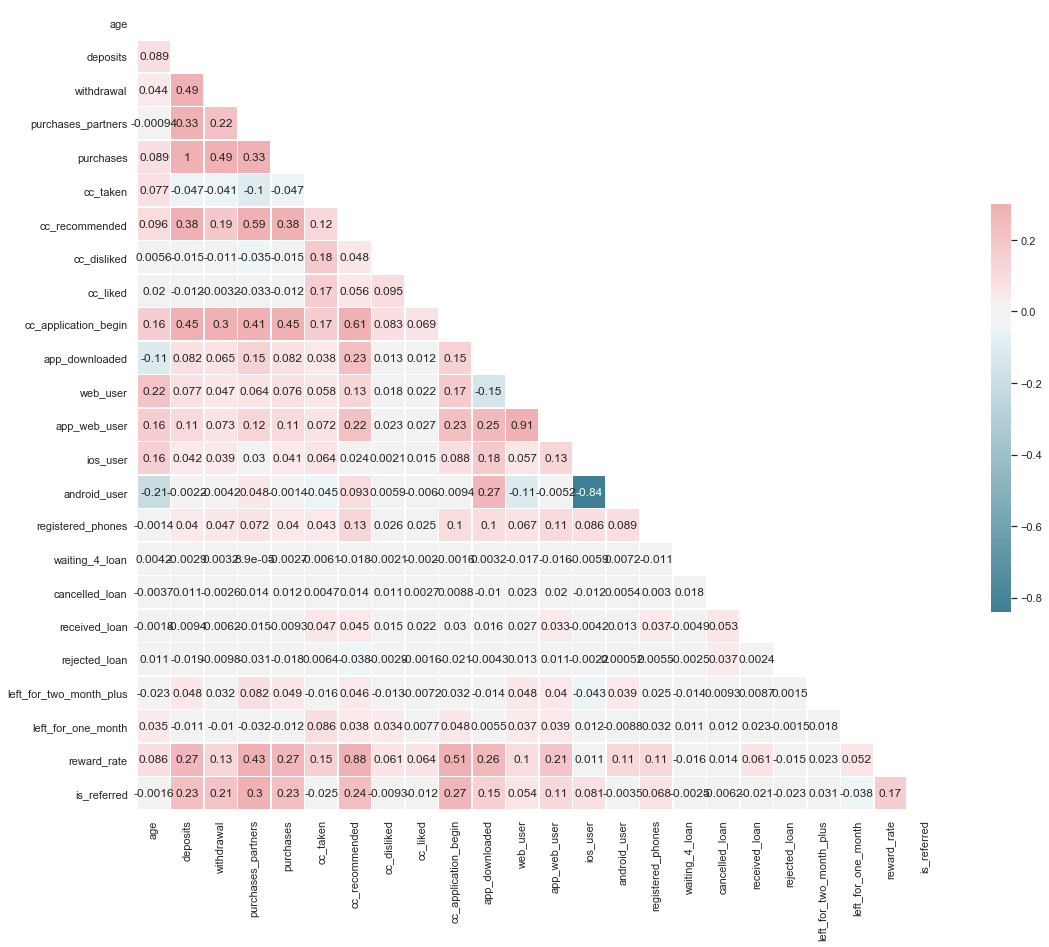

In [52]:
#correlation matrix

sns.set(style='white')
corr = dataset.drop(columns=['user','churn']).corr()

mask= np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax = plt.subplots(figsize=(18,15))
cmap=sns.diverging_palette(220,10,as_cmap=True)


sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.3,center=0,square=True,linewidths=0.5,cbar_kws={'shrink':.5},annot=True)

In [54]:
dataset= dataset.drop(columns=['app_web_user'])

In [55]:
dataset.to_csv('new_churned_data.csv',index=False)